In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 ' Linux'로 확인
    
    if system_name == 'Darwin':
        font_family = 'AppleGothic'
    elif system_name == 'Windows':
        font_family = 'Malgun Gothic'
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야 한다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐
        !apt-get update -qq
        !apt-get install fonts-nanum -qq > /dev/null
        
        import matplotlib.font_manager as fm
        
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = 'NanumBarunGothic'
    return font_family

font_family = get_font_family()

# 그래프 스타일 설정
# 그래프 스타일을 밑에서 설정하면 폰트가 깨진다
plt.style.use('dark_background')
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스 폰트 설정
plt.rc('axes', unicode_minus=False)

In [29]:
df = pd.read_csv('eft_2021-09-04.csv', dtype={'종목코드': object})
df.head()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
0,069500,1,KODEX 200,41930,2,270,0.65,41979.0,-3.1976,2807005,117551,54593,국내 시장지수,KODEX,False,False,False
1,102110,1,TIGER 200,41960,2,270,0.65,42009.0,-3.1484,992124,41597,23225,국내 시장지수,TIGER,False,False,False
2,153130,6,KODEX 단기채권,102885,2,10,0.01,102883.0,0.0291,7598,781,20968,채권,KODEX,False,False,False
3,252670,3,KODEX 200선물인버스2X,2000,5,-25,-1.23,2004.0,5.2631,113442718,227795,20042,국내 파생,KODEX,True,False,False
4,371460,4,TIGER 차이나전기차SOLACTIVE,16480,5,-670,-3.91,NaN,26.3319,12395343,207101,18702,해외 주식,TIGER,False,False,False


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   종목코드        502 non-null    object 
 1   탭코드         502 non-null    int64  
 2   종목명         502 non-null    object 
 3   현재가         502 non-null    int64  
 4   등락구분        502 non-null    int64  
 5   전일비         502 non-null    int64  
 6   등락률         502 non-null    float64
 7   순자산가치(NAV)  358 non-null    float64
 8   3개월수익률      476 non-null    float64
 9   거래량         502 non-null    int64  
 10  거래대금(백만)    502 non-null    int64  
 11  시가총액(억)     502 non-null    int64  
 12  유형          502 non-null    object 
 13  브랜드         502 non-null    object 
 14  인버스         502 non-null    bool   
 15  레버리지        502 non-null    bool   
 16  환헤지H        502 non-null    bool   
dtypes: bool(3), float64(3), int64(7), object(4)
memory usage: 56.5+ KB


In [31]:
df.isnull().sum()

종목코드            0
탭코드             0
종목명             0
현재가             0
등락구분            0
전일비             0
등락률             0
순자산가치(NAV)    144
3개월수익률         26
거래량             0
거래대금(백만)        0
시가총액(억)         0
유형              0
브랜드             0
인버스             0
레버리지            0
환헤지H            0
dtype: int64

In [32]:
# 결측치의 비율
df.isnull().mean() * 100

종목코드           0.000000
탭코드            0.000000
종목명            0.000000
현재가            0.000000
등락구분           0.000000
전일비            0.000000
등락률            0.000000
순자산가치(NAV)    28.685259
3개월수익률         5.179283
거래량            0.000000
거래대금(백만)       0.000000
시가총액(억)        0.000000
유형             0.000000
브랜드            0.000000
인버스            0.000000
레버리지           0.000000
환헤지H           0.000000
dtype: float64

<AxesSubplot:>

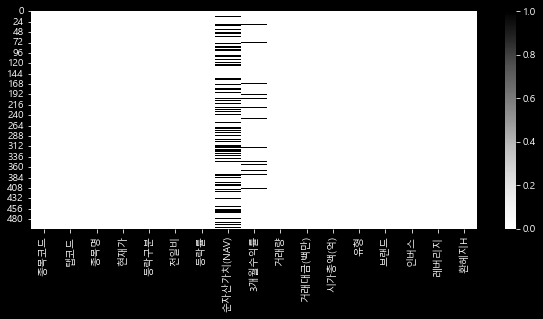

In [33]:
# 결측치 시각화 heatmap
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(),cmap='Greys')

In [34]:
df.describe(include=object)

,종목코드,종목명,유형,브랜드
count,502,502,502,502
unique,502,502,7,17
top,069500,KODEX 200,국내 업종/테마,TIGER
freq,1,1,188,131


In [35]:
# 갯수가 많은 순으로 정렬된 index를 가져온다
df['유형'].value_counts().index

Index(['국내 업종/테마', '해외 주식', '국내 시장지수', '채권', '국내 파생', '기타', '원자재'], dtype='object')

<AxesSubplot:xlabel='count', ylabel='유형'>

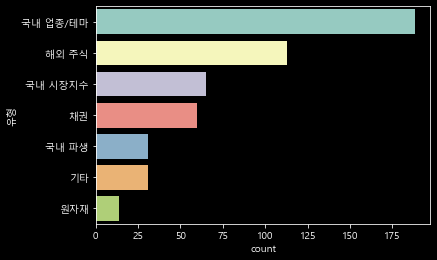

In [39]:
# count 값으로 정렬하기
sns.countplot(data=df, y='유형', order=df['유형'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='유형'>

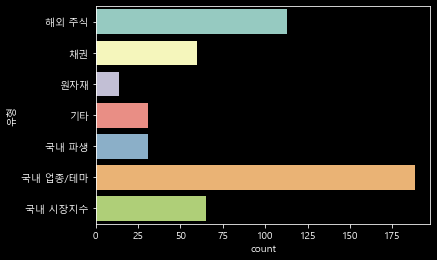

In [40]:
# 가나다 (역)순으로 정렬하기
sns.countplot(data=df.sort_values('유형', ascending=False), y='유형')

In [41]:
df['유형'].value_counts()

국내 업종/테마    188
해외 주식       113
국내 시장지수      65
채권           60
국내 파생        31
기타           31
원자재          14
Name: 유형, dtype: int64

In [42]:
df['유형'].value_counts(normalize=True) * 100

국내 업종/테마    37.450199
해외 주식       22.509960
국내 시장지수     12.948207
채권          11.952191
국내 파생        6.175299
기타           6.175299
원자재          2.788845
Name: 유형, dtype: float64

<AxesSubplot:xlabel='count', ylabel='유형'>

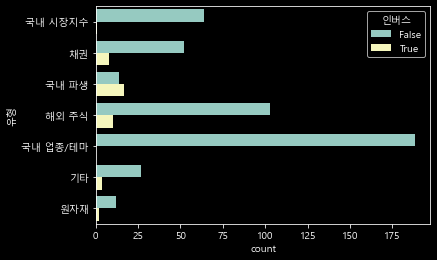

In [43]:
sns.countplot(data=df, y='유형', hue='인버스')

In [44]:
pd.crosstab(df['인버스'], df['유형'])

유형,국내 시장지수,국내 업종/테마,국내 파생,기타,원자재,채권,해외 주식
인버스,,,,,,,
False,64,188,14,27,12,52,103
True,1,0,17,4,2,8,10


In [47]:
pd.crosstab(df['인버스'], df['유형'], normalize=True) * 100

유형,국내 시장지수,국내 업종/테마,국내 파생,기타,원자재,채권,해외 주식
인버스,,,,,,,
False,12.749004,37.450199,2.788845,5.378486,2.390438,10.358566,20.517928
True,0.199203,0.000000,3.386454,0.796813,0.398406,1.593625,1.992032
